In [5]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import fastell4py

In [22]:

# specify the choice of lens models #
# lens_model_list = ['SPEP', 'SHEAR', 'SIS']
lens_model_list = ['POINT_MASS']

# setup lens model class with the list of lens models #
lensModel = LensModel(lens_model_list=lens_model_list)

# define parameter values of lens models #
kwargs_spep = {'theta_E': .9, 'e1': 0.05, 'e2': 0.05, 'gamma': 2., 'center_x': 0.1, 'center_y': 0}
kwargs_shear = {'e1': 0.05, 'e2': 0.0}
kwargs_sis = {'theta_E': 0.1, 'center_x': 1., 'center_y': -0.1}
kwargs_pm = {'theta_E':0.5, 'center_x':0, 'center_y':0}
kwargs_lens = [kwargs_pm]

# image plane coordinate #
theta_ra, theta_dec = .9, .4

# source plane coordinate #
beta_ra, beta_dec = lensModel.ray_shooting(theta_ra, theta_dec, kwargs_lens)
# Fermat potential #
fermat_pot = lensModel.fermat_potential(x_image=theta_ra, y_image=theta_dec, x_source=beta_ra, y_source=beta_dec, kwargs_lens=kwargs_lens)

# Magnification #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)

print(mag)

1.36184686641


[ 0.9] [ 0.4]


/home/minghao/anaconda3/lib/python3.5/site-packages/lenstronomy/Plots/output_plots.py:133: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(kappa_result), origin='lower',
/home/minghao/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


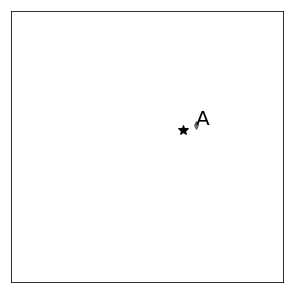

In [28]:

from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

# specifiy the lens model class to deal with #
solver = LensEquationSolver(lensModel)

# solve for image positions provided a lens model and the source position #
theta_ra, theta_dec = solver.image_position_from_source(\
                        beta_ra, beta_dec, kwargs_lens, min_distance = 1e-2,\
                        num_iter_max=1e5)

print(theta_ra, theta_dec)

f, axex = plt.subplots(1, 1, figsize=(10, 5), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, lensModel=lensModel,\
                          kwargs_lens=kwargs_lens,\
                          sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=False)
f.show()